In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# daily data used for US analysis
df_init = pd.read_csv('data/04-04-2020.csv')
df_density = pd.read_excel('data/density.xlsx')

# time-series data used for US to other counties comparisons
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# cleaning the data
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

# grabbing only the US data
df_us = df_init.loc[df_init["Country_Region"]== "US"] 

# Renaming to more standard names
df_us = df_us.rename(columns={"Admin2":"County"})
df_us = df_us.rename(columns={"Confirmed":"Cases"})
df_us = df_us.rename(columns={'Province_State':'State'})

In [3]:
total = df_us.sum()
total.name = 'Total'

# calculating mortality rate
total["Mortality Rate"] = np.round(100*total["Deaths"]/total["Cases"],2)

# US Total Data table
pd.DataFrame(total).transpose().loc[:,["Cases","Deaths", 'Mortality Rate']]

,Cases,Deaths,Mortality Rate
Total,308850,8407,2.72


In [4]:
# US Top 10 states data table
df_us.loc[:,["Cases","Deaths","State"]].groupby(["State"]).sum().sort_values("Cases",ascending=False)[:10]

,Cases,Deaths
State,,
New York,113833,3565
New Jersey,34124,846
Michigan,14225,540
California,12837,289
Louisiana,12496,409
Massachusetts,11736,216
Florida,11545,195
Pennsylvania,10444,136
Illinois,10357,244


In [5]:
# US Top 10 Counties
df_us.loc[:,["State","Cases","Deaths","County"]].sort_values("Cases",ascending=False).set_index("County")[:10]

,State,Cases,Deaths
County,,,
New York City,New York,63306,1905
Nassau,New York,13346,95
Westchester,New York,13081,67
Suffolk,New York,11370,124
Cook,Illinois,7439,167
Wayne,Michigan,6762,252
Bergen,New Jersey,5760,179
Rockland,New York,4872,69
Los Angeles,California,4605,93


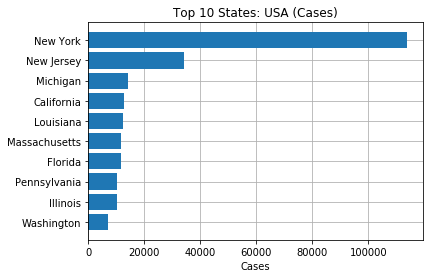

In [6]:
# Top 10 States USA Cases
f = plt.figure()

# 1x1 grid, first subplot
f.add_subplot(111)

# Remove lines through the bars
plt.axes(axisbelow=True)

# Plotting the cases
plt.barh(df_us.groupby(["State"]).sum().sort_values('Cases')["Cases"].index[-10:],df_us.groupby(["State"]).sum().sort_values('Cases')["Cases"].values[-10:])
plt.xlabel("Cases")
plt.title("Top 10 States: USA (Cases)")
plt.grid()
plt.savefig('figures/Top 10 States_USA (Cases).png')